enter n = 10000
Possible values of koff when kon = 0.5, for information of modification to be in range of 2.27 to 2.32 [0.18000000000000002, 0.19, 0.2, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.1300000000000001, 1.1400000000000001, 1.1500000000000001, 1.1600000000000001, 1.17, 1.19]


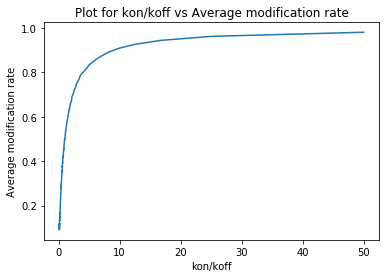

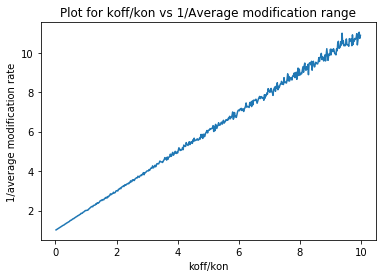

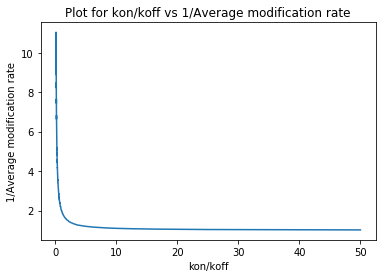

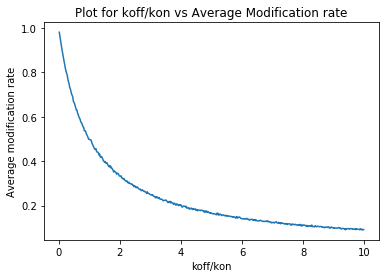

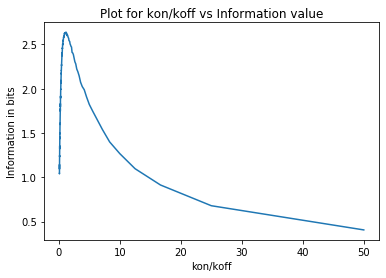

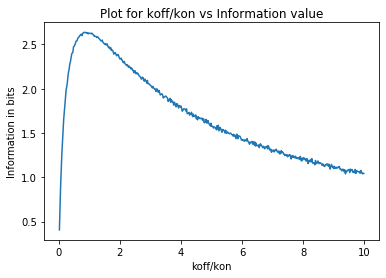

In [7]:
#avg rate of modification vs kon/koff
import numpy as np
import math
import random
import matplotlib.pyplot as plt
def mon(n,kf):
    #i = int(input("Enter the number of nucleosomes = "))
    i = 3
    x_array = np.zeros((n,i))
    t_array = np.zeros(n)
    t = 0
    mi = 0
    l = []
    for y in range(n):
        for z in range(i):
            kon = 0.5
            koff = kf
            #koff = 0.02
            a = 1/(kon+koff)
            pa = kon*a
            pb = koff*a
            
            r1 = random.uniform(0,1)
            if r1<pa:
                mz = 1
            else:
                mz = 0
            x_array[y,z] = mz
                
            r2 = random.uniform(0,1)
            dt = (-1)*a*math.log(r2)
            t = t + dt
        t_array[y] = t
    
    x1 = x_array[:,0].tolist()
    x2 = x_array[:,1].tolist()
    x3 = x_array[:,2].tolist()
    #print(x1,x2,x3)
    s1 = 0;s2 = 0; s3 = 0; s4 = 0; s5 = 0; s6 = 0; s7 = 0; s0 = 0
    for i in range(n):
        if x1[i]==1 and x2[i]==0 and x3[i]==0:
            s1 +=1
        else:
            s1 +=0
            
        if x2[i] == 1 and x1[i]==0 and x3[i]==0:
            s2 +=1
        else:
            s2 +=0
            
        if x3[i]==1 and x1[i]==0 and x2[i]==0:
            s3 +=1
        else:
            s3 +=0
        
        if x1[i]==0 and x2[i]==0 and x3[i]==0:
            s0 += 1
        else:
            s0 += 0
        
        if x1[i]==1 and x2[i]==1 and x3[i]==0:
            s4 += 1
        else:
            s4 += 0
        
        if x1[i]==0 and x2[i]==1 and x3[i]==1:
            s5 += 1
        else:
            s5 += 0
        
        if x1[i]==1 and x2[i]==0 and x3[i]==1:
            s6 += 1
        else:
            s6 += 0
            
        if x1[i]==1 and x2[i]==1 and x3[i]==1:
            s7 += 1
        else:
            s7 += 0
    
    #print(s0,s1,s2,s3,s4,s5,s6,s7,s0)
    p0 = s0/n; p1= s1/n; p2 = s2/n; p3 = s3/n; p4 = s4/n; p5 = s5/n; p6 = s5/n; p6 = s6/n; p7 = s7/n
    total = p0+p1+p2+p3+p4+p5+p6+p7
    #print('probablity for 8 microstates are : p0 =',p0,'p1 =',p1,'p2 =',p2,'p3 =',p3,'p4 =',p4,'p5 =',p5,'p6 =',p6,'p7 =',p7)
    in0 = 0; in1 = 0; in2 = 0; in3 = 0; in4 = 0; in5 = 0; in6 = 0; in7 = 0
        
    if p0 == 0:
        in0 = 0
    else:
        in0 = (p0*math.log2(p0))
    
    if p1 == 0:
        in1 = 0
    else:
        in1 = (p1*math.log2(p1))
    
    if p2 ==0:
        in2 = 0
    else:
        in3 = (p2*math.log2(p2))
    
    if p3 ==0:
        in3 = 0
    else:
        in3 = (p3*math.log2(p3))
        
    if p4==0:
        in4 = 0
    else:
        in4 = (p4*math.log2(p4))
        
    if p5==0:
        in5 =0
    else:
        in5 = (p5*math.log2(p5))
        
    if p6==0:
        in6 =0
    else:
        in6 = (p6*math.log2(p6))
        
    if p7 ==0:
        in7 = 0
    else:
        in7 = (p7*math.log2(p7))
        
    inf = -(in0+in1+in2+in3+in4+in5+in6+in7)        
    
    nc = np.count_nonzero(x_array== 1, axis=1)
    #print(nc)
    clist = nc.tolist()
    avr = sum(clist)/(n*3)
    return (kon/koff,avr,inf)
    
a_list = []
a2_list = []
i_list = []
m_list = []
r_list = []
r2_list = []
xx = []
yy = []
xo = []
nu = int(input('enter n = '))
for i in np.arange(0.01,5.0,0.01):
    n = nu
    (ri,ai,nf) = mon(n,i)
    a_list.append(ai)
    a2_list.append(1/ai)
    r_list.append(ri)
    r2_list.append(1/ri)
    i_list.append(i)
    xx.append(nf)
    if nf >2.22745703 and nf< 2.370568562:
        m_list.append(i)

print('Possible values of koff when kon = 0.5, for information of modification to be in range of 2.27 to 2.32',m_list)
plt.plot(r_list,a_list)
plt.xlabel('kon/koff')
plt.ylabel('Average modification rate')
plt.title('Plot for kon/koff vs Average modification rate')
plt.show()
    
plt.plot(r2_list,a2_list)
plt.xlabel('koff/kon')
plt.ylabel('1/average modification rate')
plt.title('Plot for koff/kon vs 1/Average modification range')
plt.show()

plt.plot(r_list,a2_list)
plt.xlabel('kon/koff')
plt.ylabel('1/Average modification rate')
plt.title('Plot for kon/koff vs 1/Average modification rate')
plt.show()

plt.plot(r2_list,a_list)
plt.xlabel('koff/kon')
plt.ylabel('Average modification rate')
plt.title('Plot for koff/kon vs Average Modification rate')
plt.show()

plt.plot(r_list,xx)
plt.xlabel('kon/koff')
plt.ylabel('Information in bits')
plt.title('Plot for kon/koff vs Information value')
plt.show()

plt.plot(r2_list,xx)
plt.xlabel('koff/kon')
plt.ylabel('Information in bits')
plt.title('Plot for koff/kon vs Information value')
plt.show()



enter n = 10000
[0.21000000000000002, 0.22, 0.23, 0.24000000000000002, 0.25, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.3800000000000001, 1.3900000000000001, 1.4000000000000001, 1.4100000000000001, 1.42, 1.43, 1.44, 1.45, 1.46, 1.48, 1.53]


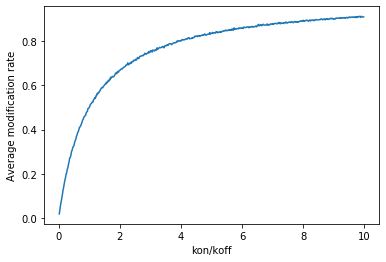

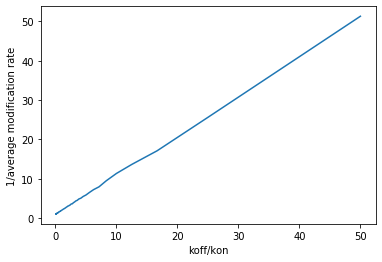

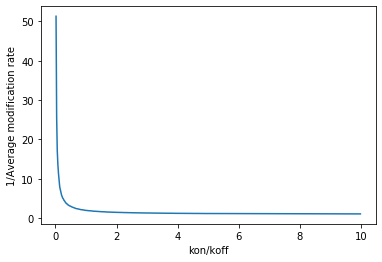

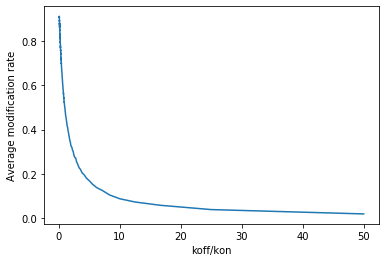

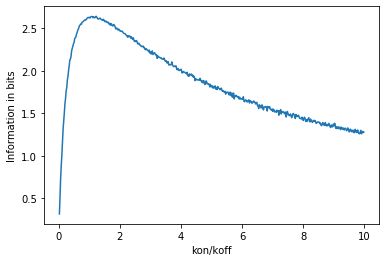

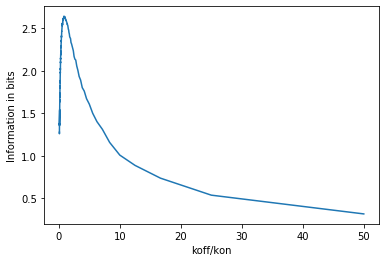

In [5]:
#avg rate of modification vs kon/koff
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
def mon(n,kn):
    #i = int(input("Enter the number of nucleosomes = "))
    i = 3
    x_array = np.zeros((n,i))
    t_array = np.zeros(n)
    t = 0
    mi = 0
    l = []
    for y in range(n):
        for z in range(i):
            koff = 0.5
            kon = kn
            #koff = 0.02
            a = 1/(kon+koff)
            pa = kon*a
            pb = koff*a
            
            r1 = random.uniform(0,1)
            if r1<pa:
                mz = 1
            else:
                mz = 0
            x_array[y,z] = mz
                
            r2 = random.uniform(0,1)
            dt = (-1)*a*math.log(r2)
            t = t + dt
        t_array[y] = t
    
    x1 = x_array[:,0].tolist()
    x2 = x_array[:,1].tolist()
    x3 = x_array[:,2].tolist()
    #print(x1,x2,x3)
    s1 = 0;s2 = 0; s3 = 0; s4 = 0; s5 = 0; s6 = 0; s7 = 0; s0 = 0
    for i in range(n):
        if x1[i]==1 and x2[i]==0 and x3[i]==0:
            s1 +=1
        else:
            s1 +=0
            
        if x2[i] == 1 and x1[i]==0 and x3[i]==0:
            s2 +=1
        else:
            s2 +=0
            
        if x3[i]==1 and x1[i]==0 and x2[i]==0:
            s3 +=1
        else:
            s3 +=0
        
        if x1[i]==0 and x2[i]==0 and x3[i]==0:
            s0 += 1
        else:
            s0 += 0
        
        if x1[i]==1 and x2[i]==1 and x3[i]==0:
            s4 += 1
        else:
            s4 += 0
        
        if x1[i]==0 and x2[i]==1 and x3[i]==1:
            s5 += 1
        else:
            s5 += 0
        
        if x1[i]==1 and x2[i]==0 and x3[i]==1:
            s6 += 1
        else:
            s6 += 0
            
        if x1[i]==1 and x2[i]==1 and x3[i]==1:
            s7 += 1
        else:
            s7 += 0
    
    #print(s0,s1,s2,s3,s4,s5,s6,s7,s0)
    p0 = s0/n; p1= s1/n; p2 = s2/n; p3 = s3/n; p4 = s4/n; p5 = s5/n; p6 = s5/n; p6 = s6/n; p7 = s7/n
    total = p0+p1+p2+p3+p4+p5+p6+p7
    #print('probablity for 8 microstates are : p0 =',p0,'p1 =',p1,'p2 =',p2,'p3 =',p3,'p4 =',p4,'p5 =',p5,'p6 =',p6,'p7 =',p7)
    in0 = 0; in1 = 0; in2 = 0; in3 = 0; in4 = 0; in5 = 0; in6 = 0; in7 = 0
        
    if p0 == 0:
        in0 = 0
    else:
        in0 = (p0*math.log2(p0))
    
    if p1 == 0:
        in1 = 0
    else:
        in1 = (p1*math.log2(p1))
    
    if p2 ==0:
        in2 = 0
    else:
        in3 = (p2*math.log2(p2))
    
    if p3 ==0:
        in3 = 0
    else:
        in3 = (p3*math.log2(p3))
        
    if p4==0:
        in4 = 0
    else:
        in4 = (p4*math.log2(p4))
        
    if p5==0:
        in5 =0
    else:
        in5 = (p5*math.log2(p5))
        
    if p6==0:
        in6 =0
    else:
        in6 = (p6*math.log2(p6))
        
    if p7 ==0:
        in7 = 0
    else:
        in7 = (p7*math.log2(p7))
        
    inf = -(in0+in1+in2+in3+in4+in5+in6+in7)        
    
    nc = np.count_nonzero(x_array== 1, axis=1)
    #print(nc)
    clist = nc.tolist()
    avr = sum(clist)/(n*3)
    return (kon/koff,avr,inf)
    
a_list = []
a2_list = []
i_list = []
m_list = []
r_list = []
r2_list = []
xx = []
yy = []
xo = []
nu = int(input('enter n = '))
for i in np.arange(0.01,5.0,0.01):
    n = nu
    (ri,ai,nf) = mon(n,i)
    a_list.append(ai)
    a2_list.append(1/ai)
    r_list.append(ri)
    r2_list.append(1/ri)
    i_list.append(i)
    xx.append(nf)
    if nf >2.22745703 and nf< 2.370568562:
        m_list.append(i)

print(m_list)
plt.plot(r_list,a_list)
plt.xlabel('kon/koff')
plt.ylabel('Average modification rate')
plt.show()
    
plt.plot(r2_list,a2_list)
plt.xlabel('koff/kon')
plt.ylabel('1/average modification rate')
plt.show()

plt.plot(r_list,a2_list)
plt.xlabel('kon/koff')
plt.ylabel('1/Average modification rate')
plt.show()

plt.plot(r2_list,a_list)
plt.xlabel('koff/kon')
plt.ylabel('Average modification rate')
plt.show()

plt.plot(r_list,xx)
plt.xlabel('kon/koff')
plt.ylabel('Information in bits')
plt.show()

plt.plot(r2_list,xx)
plt.xlabel('koff/kon')
plt.ylabel('Information in bits')
plt.show()